In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
np.random.seed(42)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})


In [410]:
def plot_convex_hull(points, hull):
	"""
	Plots the convex hull of a set of points in 2D.

	Parameters:
	points (array-like): An array of shape (n, 2) where n is the number of points.
	"""
	# Convert points to a numpy array
	points = np.array(points)

	# Plot the points
	plt.plot(points[:, 0], points[:, 1], 'o', label='Points')
	plt.rcParams["figure.figsize"] = (10,6)

	# Plot the convex hull
	# for simplex in hull.simplices:
	# 	plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
	
	plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], alpha=0.3, label='Convex Hull')
	plt.title('Convex Hull of Points')
	plt.xlabel('X-axis')
	plt.ylabel('Y-axis')
	plt.legend()
	ax = plt.gca()
	ax.set_aspect('equal', adjustable='box')
	# plt.grid()
	return plt

In [411]:
def hull_extentions(X, t):
	"""
	Calculates the directions of the convex hull's extents in 2D.
	"""
	directions = np.array([np.array([np.cos(theta), np.sin(theta)]) for theta in np.linspace(0, 2 * np.pi, t)])
	extents = dict({})
	extents_max = dict({})
	for x in X:
		extents[tuple(x)] = []
		extents_max[tuple(x)] = (None, -1)

	dot_products = np.dot(X, directions.T)
	for i, direction in enumerate(directions):
		x = X[np.argmax(dot_products[:, i])]
		extents[tuple(x)].append(direction)
		if extents_max[tuple(x)][1] < dot_products[np.argmax(dot_products[:, i]), i]:
			extents_max[tuple(x)] = (direction, dot_products[np.argmax(dot_products[:, i]), i])

	random_directions = np.random.normal(size=(50, 2))
	random_directions /= np.linalg.norm(random_directions, axis=1)[:, np.newaxis]
	random_extents = dict({})
	for x in X:
		random_extents[tuple(x)] = []
	random_dot_products = np.dot(X, random_directions.T)
	for i, random_directions in enumerate(random_directions):
		x = X[np.argmax(random_dot_products[:, i])]
		random_extents[tuple(x)].append(random_directions)
	return extents, random_extents, extents_max


In [412]:
def plot_convex_hull_extents(points, hull, t):
	"""
	Plots the convex hull and its extents.

	Parameters:
	points (array-like): An array of shape (n, 2) where n is the number of points.
	"""
	plt = plot_convex_hull(points, hull)
	extents, rex, mx = hull_extentions(points, t)

	for point, directions in extents.items():
		for direction in directions:
			plt.arrow(point[0], point[1], direction[0], direction[1], 
				head_width=0, head_length=0, fc='b', ec='b', alpha=0.02)

	for point, directions in rex.items():
		for direction in directions:
			plt.arrow(point[0], point[1], direction[0], direction[1], 
				head_width=0.1, head_length=0.2, fc='r', ec='r', alpha=0.2)
	
	for point, _max in mx.items():
		direction = _max[0]
		if direction is None:
			continue
		plt.arrow(point[0], point[1], direction[0]*1.2, direction[1]*1.2, 
			head_width=0.1, head_length=0.2, fc='g', ec='g', alpha=0.7)

	return plt

In [413]:
def plot_all(X):
	X = np.array(X)
	hull = ConvexHull(X)
	plt = plot_convex_hull_extents(X, hull, 1000)
	# vertices = list(hull.vertices)
	# vertices.append(vertices[0])
	# for i in range(len(vertices)-1):
	# 	v, u = X[vertices[i]], X[vertices[i+1]]
	# 	e = np.array(u-v,dtype=float)
	# 	e+= [1e-5, 1e-5]
	# 	print(f"e: {e}, v: {v}, u: {u}, u-v: {u-v}")
	# 	plt.arrow(v[0], v[1], e[0], e[1], 
	# 		head_width=0.1, head_length=0.2, fc='b', ec='b')
		
	# 	dir = bool(e[1]<0 and e[0]>0)
	# 	mask = [-1,1] if dir else [1,-1]
	# 	perp_e = 1/e*mask
	# 	perp_e /= np.linalg.norm(perp_e)/1.2
	# 	print(f"perp_e: {perp_e}, dir: {"-" if dir else "+"}, mask: {mask}, 1/e:{np.array([1/e[0], 1/e[1]])}")

	# 	plt.arrow(v[0], v[1], perp_e[0], perp_e[1], 
	# 		head_width=0.1, head_length=0.2, fc='g', ec='g', alpha=1)
	# 	plt.arrow(u[0], u[1], perp_e[0], perp_e[1], 
	# 		head_width=0.1, head_length=0.2, fc='g', ec='g', alpha=1)
	plt.show()

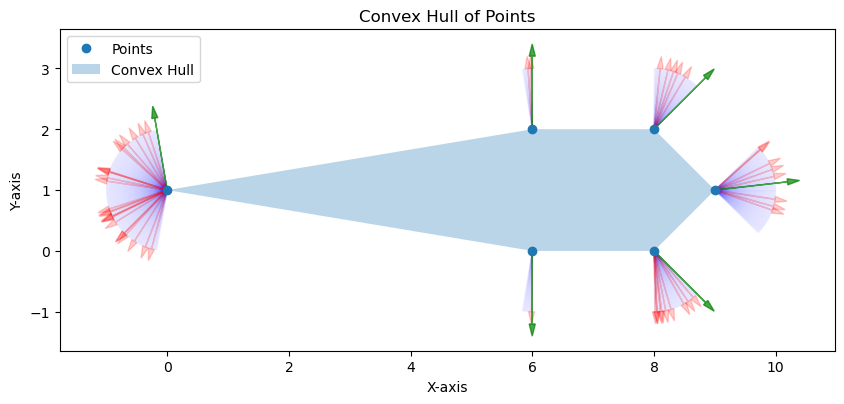

In [414]:
X = [(0,1), (6,0), (8,0), (9,1), (8,2), (6,2)]
X = np.array(X)
hull = ConvexHull(X)
plot_all(X)
# print(hull.simplices)
# print(hull.vertices)
# for simplex in hull.simplices:
# 	plt.plot(X[simplex, 0], X[simplex, 1], 'k-')
# 	print(X[simplex, 0], X[simplex, 1], '----')
# plt.show()

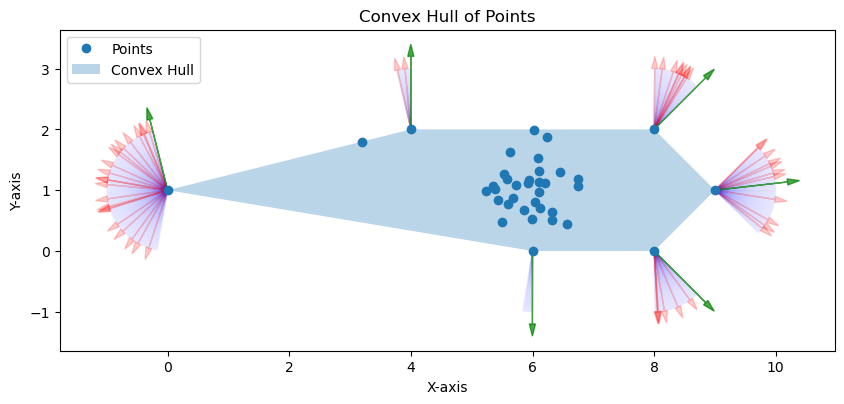

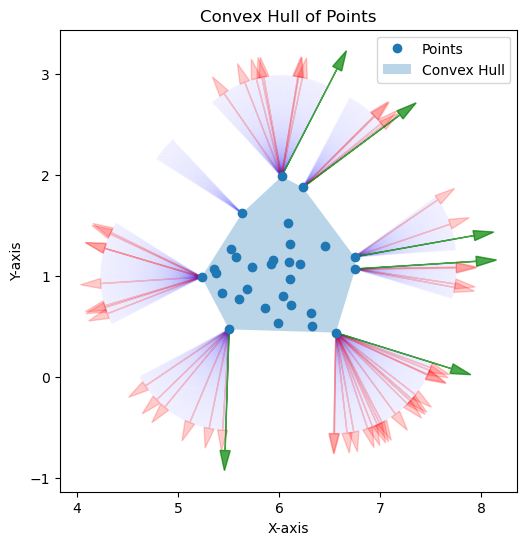

In [415]:
Z = [(0,1), (6,0), (8,0), (9,1), (8,2), (4,2), (4*0.8, 2*0.8+1*0.2)]
_Z = np.random.normal(loc=(6,1), scale=0.4, size=(30,2))
Z = np.concatenate((Z, _Z), axis=0)
plot_all(Z)
plot_all(_Z)